<a href="https://colab.research.google.com/github/nnttluna/brain_aging-regression/blob/main/brain_age_regression_penalized_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Portfolio/brain_age_regression.csv')
print(data.head())

   S.No  Left-Lateral-Ventricle  Left-Inf-Lat-Vent  \
0     1                 22916.9              982.7   
1     2                 22953.2              984.5   
2     3                 23320.4             1062.1   
3     4                 24360.0             1000.5   
4     5                 25769.4             1124.4   

   Left-Cerebellum-White-Matter  Left-Cerebellum-Cortex  Left-Thalamus  \
0                       15196.7                 55796.4         6855.5   
1                       15289.7                 55778.6         6835.1   
2                       15382.1                 55551.2         7566.0   
3                       14805.4                 54041.8         8004.6   
4                       16331.1                 54108.6         6677.4   

   Left-Caudate  Left-Putamen  Left-Pallidum  3rd-Ventricle  ...  \
0        2956.4        4240.7         2223.9         2034.4  ...   
1        3064.2        4498.6         2354.1         1927.1  ...   
2        3231.7        445

In [3]:
# Separate Target Variable and Predictor Variables
y=data['Age'].values
X=data[['Left-Lateral-Ventricle', 'Left-Inf-Lat-Vent', 'Left-Cerebellum-White-Matter', 'Left-Cerebellum-Cortex',
        'Left-Thalamus', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum','3rd-Ventricle','4th-Ventricle',
        'Brain-Stem','Left-Hippocampus','Left-Amygdala', 'CSF','Left-Accumbens-area','Left-VentralDC',
        'Left-vessel','Left-choroid-plexus','Right-Lateral-Ventricle','Right-Inf-Lat-Vent','Right-Cerebellum-White-Matter',
        'Right-Cerebellum-Cortex', 'Right-Thalamus','Right-Caudate','Right-Putamen',
        'Right-Pallidum','Right-Hippocampus','Right-Amygdala','Right-Accumbens-area',
        'Right-VentralDC','Right-vessel','Right-choroid-plexus',
        '5th-Ventricle','WM-hypointensities','Left-WM-hypointensities',
        'Right-WM-hypointensities','non-WM-hypointensities','Left-non-WM-hypointensities',
        'Right-non-WM-hypointensities','Optic-Chiasm','CC_Posterior','CC_Mid_Posterior',
        'CC_Central','CC_Mid_Anterior','CC_Anterior','BrainSegVol','BrainSegVolNotVent']].values

In [4]:
train = data[:4000]
test = data[4000:]
X_test = X[4000:]
y_test = y[4000:]
X_train = X[:4000]
y_train = y[:4000]

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from patsy import dmatrices, dmatrix
import matplotlib.pyplot as plt
import math
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)
# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

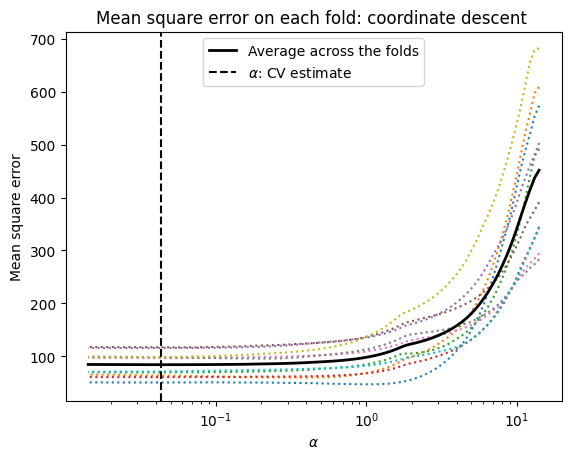

Optimized alpha [14.08755217 13.1380983  12.25263445 11.42684789 10.65671659  9.93848956
  9.26866863  8.64399138  8.06141529  7.51810288  7.01140791  6.53886248
  6.09816504  5.68716912  5.30387296  4.94640967  4.61303822  4.30213488
  4.01218539  3.74177752  3.48959424  3.25440727  3.03507111  2.83051747
  2.63975007  2.46183975  2.29591999  2.14118267  1.99687412  1.86229149
  1.73677928  1.61972617  1.51056204  1.40875522  1.31380983  1.22526344
  1.14268479  1.06567166  0.99384896  0.92686686  0.86439914  0.80614153
  0.75181029  0.70114079  0.65388625  0.6098165   0.56871691  0.5303873
  0.49464097  0.46130382  0.43021349  0.40121854  0.37417775  0.34895942
  0.32544073  0.30350711  0.28305175  0.26397501  0.24618398  0.229592
  0.21411827  0.19968741  0.18622915  0.17367793  0.16197262  0.1510562
  0.14087552  0.13138098  0.12252634  0.11426848  0.10656717  0.0993849
  0.09268669  0.08643991  0.08061415  0.07518103  0.07011408  0.06538862
  0.06098165  0.05687169  0.05303873  0.

In [7]:
from sklearn.linear_model import LassoCV, ElasticNetCV, RidgeCV
reg_lasso = LassoCV(cv=10).fit(X_train_std, y_train)
EPSILON = 1e-4 # This is to avoid division by zero while taking the base 10␣logarithm
plt.figure()
plt.semilogx(reg_lasso.alphas_ + EPSILON, reg_lasso.mse_path_, ':')
plt.plot(reg_lasso.alphas_ + EPSILON, reg_lasso.mse_path_.mean(axis=-1), 'k',
label='Average across the folds', linewidth=2)
plt.axvline(reg_lasso.alpha_ + EPSILON, linestyle='--', color='k',
label=r'$\alpha$: CV estimate')
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')
plt.show()
print ('Optimized alpha', reg_lasso.alphas_)

In [8]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=0.01408755)
reg.fit(X_train_std, y_train)
Lasso(alpha=0.01408755)
print('R squared training set', round(reg.score(X_train_std, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test_std, y_test)*100, 2))

R squared training set 81.59
R squared test set -89.09


In [10]:
from sklearn.metrics import mean_squared_error
predictions = reg.predict(X_test_std)
total_cases = len(y_test) # size of validation set
avg = 0.0
SSres = 0.0
SStot = 0.0
for i in range(total_cases):
  value = y_test[i]
  predict = predictions[i]
  avg = (avg + value)/2
  SSres = SSres + (value - predict)**2
  SStot = SStot + (value - avg)**2
  #print(value, '--------- ' , predict)
Rsquared_cal = 1 - SStot/SSres
print('R squared: ', Rsquared_cal)
mse = mean_squared_error(y_test, reg.predict(X_test_std))
rmse = math.sqrt(mse)
print("The rooted mean squared error (MSE) on test set:{:.4f}", rmse)

R squared:  0.9084155078317926
The rooted mean squared error (MSE) on test set:{:.4f} 9.54520775155264
